In [1]:
import cv2
import time
import cmath
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cart = cv2.imread("cart.jpg")
lakeside = cv2.imread("lakeside.jpg")
globe =  cv2.imread("1024_1024.jpg")

cart = cv2.cvtColor(cart, cv2.COLOR_BGR2GRAY)
lakeside = cv2.cvtColor(lakeside, cv2.COLOR_BGR2GRAY)
globe = cv2.cvtColor(globe, cv2.COLOR_BGR2GRAY)

IMG1 = globe
IMG2 = lakeside
IMG3 = cart

(-0.5, 360.5, 357.5, -0.5)

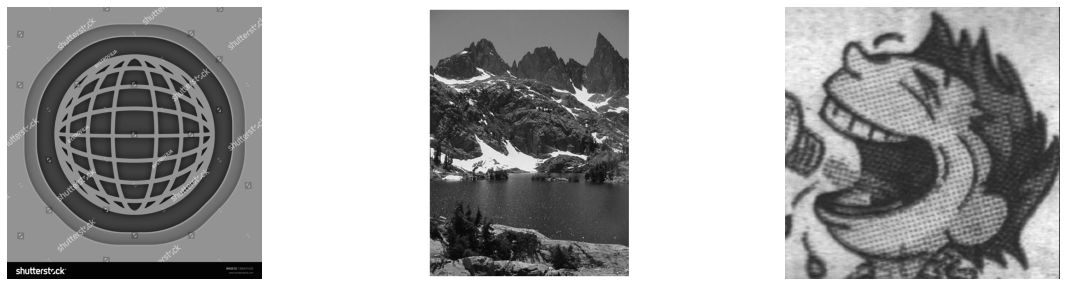

In [3]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.imshow(IMG1, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(IMG2, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(IMG3, cmap="gray")
plt.axis("off")

In [4]:
IMG1.shape, IMG2.shape, IMG3.shape

((1600, 1500), (388, 291), (358, 361))

In [35]:
img1 = cv2.resize(IMG1,(1024,1024))
img2 = cv2.resize(IMG2,(512,512))
img3 = cv2.resize(IMG3,(512,512))

### QUESTION 1

1.

In [6]:
def dft1(signal):
    N = len(signal)
    n_values = np.arange(N)
    # creates values from 0 to n-1. Say N = 4, then n_value = [0,1,2,3]
    # This is done to multiply with the integral powers of e
   
    k = n_values.reshape((N, 1))
    exponent = -2j * np.pi * k * n_values
    exponent = exponent / N
    e = np.exp(exponent)
    res = np.dot(e, signal)
    return res

In [7]:

input_signal = np.array([1,2,0,78,95,68.5, 66])
res1a = np.fft.fft(input_signal)
res1b = dft1(input_signal)

input_signal2 = np.array([85.4, 67.5, 90.6, 56.78])
res2a = np.fft.fft(input_signal2)
res2b = dft1(input_signal2)


print("RESULT USING IN BUILT FUNCTION: ")
print()
print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >= 0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in res1a))

print()
print("RESULT USING IMPLEMENTED FUNCTION FOR DFT: ")
print()
print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >= 0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in res1b))
print()

RESULT USING IN BUILT FUNCTION: 

310.50 + 0.00j  -127.71 + 124.20j  32.02 + 19.38j  -56.05 - 9.21j  -56.05 + 9.21j  32.02 - 19.38j  -127.71 - 124.20j

RESULT USING IMPLEMENTED FUNCTION FOR DFT: 

310.50 + 0.00j  -127.71 + 124.20j  32.02 + 19.38j  -56.05 - 9.21j  -56.05 + 9.21j  32.02 - 19.38j  -127.71 - 124.20j



2.

In [8]:
def dft2(arr):
    result_rows = np.apply_along_axis(dft1, axis = 1,arr = arr)
    result_final = np.apply_along_axis(dft1, axis = 0, arr = result_rows)
    return result_final

In [9]:

input_signal = np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])

check = [[1,2,3],
         [4,5,6]]

res1 = np.fft.fft2(check)
res2 = dft2(check)

print("Result using in built function for 2D FFT: ")
print()
for row in res1:
    print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >= 0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in row))

print()
print("Result using implemented function for 2D DFT: ")
print()
for row in res2:
    print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >= 0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in row))


Result using in built function for 2D FFT: 

21.00 + 0.00j  -3.00 + 1.73j  -3.00 - 1.73j
-9.00 + 0.00j  0.00 + 0.00j  0.00 + 0.00j

Result using implemented function for 2D DFT: 

21.00 + 0.00j  -3.00 + 1.73j  -3.00 - 1.73j
-9.00 - 0.00j  0.00 + 0.00j  -0.00 + 0.00j


(-0.5, 1023.5, 1023.5, -0.5)

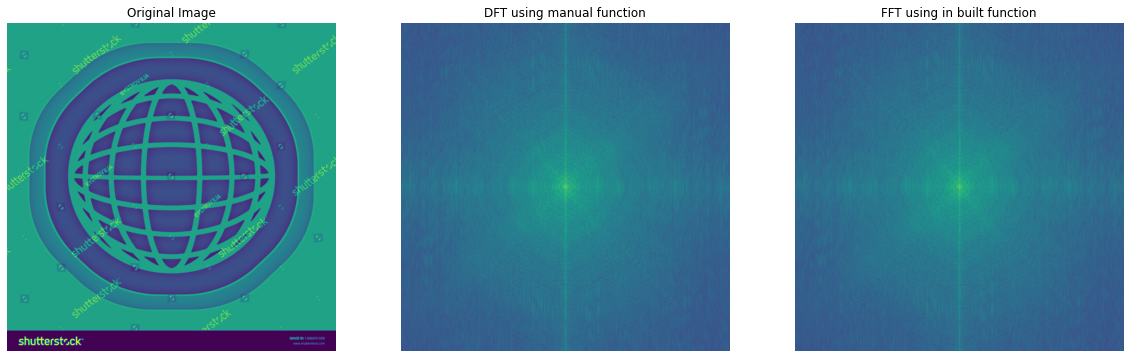

In [10]:
res1 = dft2(img1)
res2 = np.fft.fft2(img1)

shifted_fft1 = np.fft.fftshift(res1)
shifted_fft2 = np.fft.fftshift(res2)

magnitude_spectrum1 = np.abs(shifted_fft1)
magnitude_spectrum2 = np.abs(shifted_fft2)

plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.imshow(img1, cmap="viridis")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(1 + magnitude_spectrum1), cmap="viridis")
plt.title("DFT using manual function")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.log(1 + magnitude_spectrum2), cmap="viridis")
plt.title("FFT using in built function")
plt.axis("off")

3.

In [11]:

def merge_results(sigeven, sigodd, signal):
    ans = [0] * len(signal)

    for i in range(len(signal)//2):
      t = cmath.exp(-2j * cmath.pi * i / len(signal)) * sigodd[i]
      ans[i] = sigeven[i] + t
      ans[i + len(signal)//2] = sigeven[i] - t
    return ans

def next_power_of_two(n):
    power = 1
    while power < n:
        power *= 2
    return power

def fft1(signal):
    signal = list(signal)
    n = len(signal)

    # Converting signal to length that is nearest power of two
    padded_size = next_power_of_two(n)
    extra_zeros = [0] * (padded_size - n)
    signal = signal + extra_zeros
    # print(signal)

    # Base case: if the signal has only one element, return it
    if len(signal) <= 1:
        return signal

    # Divide the signal into even and odd parts
    sigeven = fft1(signal[0::2])
    sigodd = fft1(signal[1::2])
    return merge_results(sigeven, sigodd, signal)


In [12]:
input_signal = np.array([24.5 ,87.6, 90.7, 89.99, 23.567])
input_two = np.array([24.5 ,87.6, 90.7, 89.99, 23.567, 0, 0, 0])

res1 = np.fft.fft(input_two)
res2 = fft1(input_signal)

print("RESULT USING IN BUILT FUNCTION: ")
print()
print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >= 0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in res1))

print()
print("RESULT USING IMPLEMENTED FUNCTION FOR DFT: ")
print()
print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >= 0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in res2))

RESULT USING IN BUILT FUNCTION: 

316.36 + 0.00j  -0.76 - 216.28j  -42.63 + 2.39j  2.62 - 34.88j  -38.82 + 0.00j  2.62 + 34.88j  -42.63 - 2.39j  -0.76 + 216.28j

RESULT USING IMPLEMENTED FUNCTION FOR DFT: 

316.36 + 0.00j  -0.76 - 216.28j  -42.63 + 2.39j  2.62 - 34.88j  -38.82 + 0.00j  2.62 + 34.88j  -42.63 - 2.39j  -0.76 + 216.28j


4.

In [13]:
def fft2(array):
    result_rows = np.apply_along_axis(fft1, axis=1, arr=array)
    result_columns = np.apply_along_axis(fft1, axis=0, arr=result_rows)
    return result_columns

In [14]:

input_signal = np.array([[1, 2, 3],
                         [3, 2, 4],
                         [12, 4, 5]])

new_input = np.array([[1, 2, 3, 0],
                      [3, 2, 4, 0],
                      [12, 4, 5, 0],
                      [0, 0, 0, 0]])

input_signal = np.array([[67.4, 78.4, 90.6],
                         [45.0, 57.8, 90.7],
                         [98.35, 45.66, 43.22]])

new_input = np.array([[67.4, 78.4, 90.6, 0],
                      [45.0, 57.8, 90.7, 0],
                      [98.35, 45.66, 43.22, 0],
                      [0, 0, 0, 0]])

res1 = np.fft.fft2(new_input)
res2 = fft2(input_signal)

print("Result using in built function for 2D FFT: ")
print()
for row in res1:
    print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >=
          0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in row))

print()
print("Result using implemented function for 2D FFT: ")
print()

for row in res2:
    print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >=
          0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in row))

Result using in built function for 2D FFT: 

617.13 + 0.00j  -13.77 - 181.86j  253.41 + 0.00j  -13.77 + 181.86j
49.17 - 193.50j  -136.13 + 12.96j  -16.31 - 77.90j  -20.53 + 78.44j
230.13 + 0.00j  77.63 - 66.26j  97.61 + 0.00j  77.63 + 66.26j
49.17 + 193.50j  -20.53 - 78.44j  -16.31 + 77.90j  -136.13 - 12.96j

Result using implemented function for 2D FFT: 

617.13 + 0.00j  -13.77 - 181.86j  253.41 + 0.00j  -13.77 + 181.86j
49.17 - 193.50j  -136.13 + 12.96j  -16.31 - 77.90j  -20.53 + 78.44j
230.13 + 0.00j  77.63 - 66.26j  97.61 + 0.00j  77.63 + 66.26j
49.17 + 193.50j  -20.53 - 78.44j  -16.31 + 77.90j  -136.13 - 12.96j


(-0.5, 255.5, 255.5, -0.5)

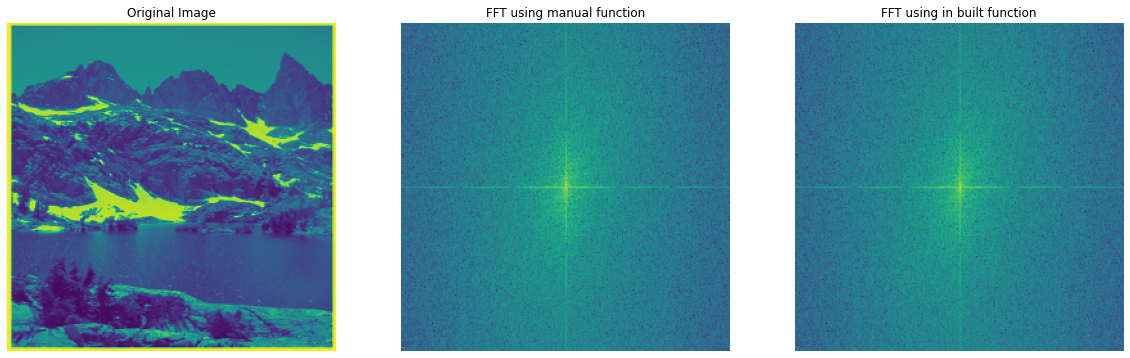

In [15]:
res1 = fft2(img2)
res2 = np.fft.fft2(img2)

shifted_fft1 = np.fft.fftshift(res1)
shifted_fft2 = np.fft.fftshift(res2)

magnitude_spectrum1 = np.abs(shifted_fft1)
magnitude_spectrum2 = np.abs(shifted_fft2)

plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.imshow(img2, cmap="viridis")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(1 + magnitude_spectrum1), cmap="viridis")
plt.title("FFT using manual function")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.log(1 + magnitude_spectrum2), cmap="viridis")
plt.title("FFT using in built function")
plt.axis("off")

5.

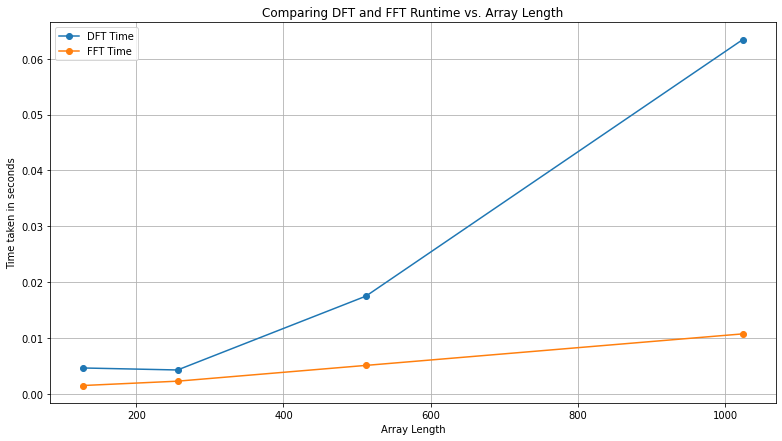

In [16]:
lens = [128,256,512,1024]

dft_time_array = []
fft_time_array = []

for i in range(4):
    random_array = np.random.randint(low=0, high=100, size=lens[i])
    
    start = time.time()
    dft1(random_array)
    dft_time = time.time() - start
    dft_time_array.append(dft_time)

    start_again = time.time()
    fft1(random_array)
    fft_time = time.time() - start_again
    fft_time_array.append(fft_time)

plt.figure(figsize = (13,7))
plt.grid(True)
plt.plot(lens, dft_time_array, label='DFT Time', marker="o")
plt.plot(lens, fft_time_array, label='FFT Time', marker="o")
plt.xlabel('Array Length')
plt.ylabel('Time taken in seconds')
plt.legend()
plt.title('Comparing DFT and FFT Runtime vs. Array Length')
plt.show()

* It can be observed that when analyzing arrays with relatively small lengths, upto around 250 values, the execution time of the Fast Fourier Transform (FFT) is comparable, and sometimes even slightly larger, than that of the Discrete Fourier Transform (DFT).

* However, as array length increases, the time time taken by DFT increases steeply while that of FFT exhibits only a marginal increase in execution time. It eventually levels off and remains relatively constant.

* This is because the FFT employes a recursive algorithm. This might incur an overhead in case of small array lengths, resulting in occasional steeper slope of FFT line compared to DFT line in the graph. However, for larger values of array length, FFT has considerable advantage over DFT in terms of computational complexity due to its divide-and-conquer strategy.

6.

In [17]:
n = 256
x = np.linspace(-4*np.pi, 4* np.pi,n)
y = np.linspace(-4*np.pi, 4*np.pi, n)

X, Y = np.meshgrid(x, y)

signal_a = 0.5 * (1 + np.sin(X))
signal_b = 0.5 * (1 + np.sin(X) * np.sin(Y))
signal_c = 0.5 * (1 + np.sin(X**2 + Y**2))


### I = 0.5 * (1 + sin(x))

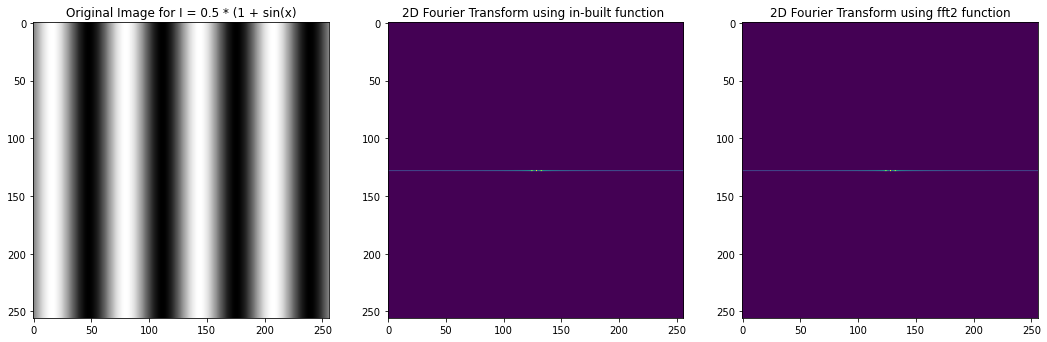

In [18]:
fft_result1 = np.fft.fft2(signal_a)
fft_result2 = fft2(signal_a)

shifted_fft1 = np.fft.fftshift(fft_result1)
shifted_fft2 = np.fft.fftshift(fft_result2)

magnitude_spectrum1 = np.abs(shifted_fft1)
magnitude_spectrum2 = np.abs(shifted_fft2)

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1), plt.imshow(signal_a, cmap='gray')
plt.title('Original Image for I = 0.5 * (1 + sin(x)')

plt.subplot(1,3,2), plt.imshow(np.log(1 + magnitude_spectrum1), cmap='viridis')
plt.title('2D Fourier Transform using in-built function ')

plt.subplot(1,3,3), plt.imshow(np.log(1 + magnitude_spectrum2), cmap='viridis')
plt.title('2D Fourier Transform using fft2 function')

plt.show()


### 0.5 *  (1 + sin(x) * sin(y)) 

b. 

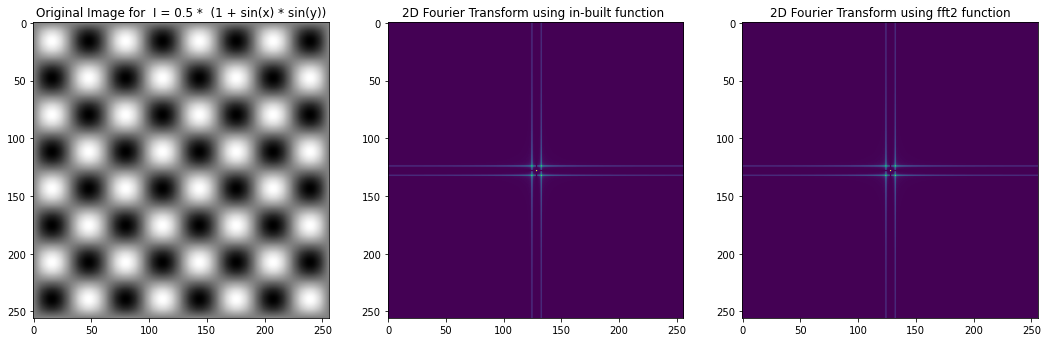

In [19]:
fft_result1 = np.fft.fft2(signal_b)
fft_result2 = fft2(signal_b)

shifted_fft1 = np.fft.fftshift(fft_result1)
shifted_fft2 = np.fft.fftshift(fft_result2)

magnitude_spectrum1 = np.abs(shifted_fft1)
magnitude_spectrum2 = np.abs(shifted_fft2)

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1), plt.imshow(signal_b, cmap='gray')
plt.title('Original Image for  I = 0.5 *  (1 + sin(x) * sin(y))')

plt.subplot(1,3,2), plt.imshow(np.log(1 + magnitude_spectrum1), cmap='viridis')
plt.title('2D Fourier Transform using in-built function ')

plt.subplot(1,3,3), plt.imshow(np.log(1 + magnitude_spectrum2), cmap='viridis')
plt.title('2D Fourier Transform using fft2 function')

plt.show()


### c. I = 0.5 * (1 + sin(x^2 + y^2))

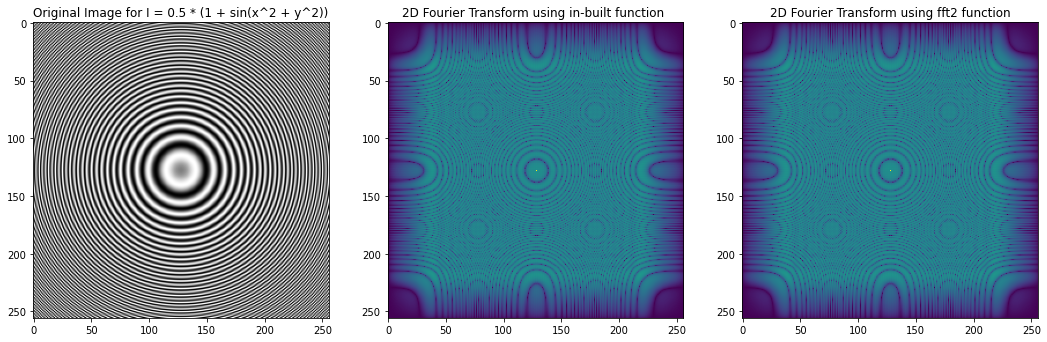

In [20]:
fft_result1 = np.fft.fft2(signal_c)
fft_result2 = fft2(signal_c)

shifted_fft1 = np.fft.fftshift(fft_result1)
shifted_fft2 = np.fft.fftshift(fft_result2)

magnitude_spectrum1 = np.abs(shifted_fft1)
magnitude_spectrum2 = np.abs(shifted_fft2)

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1), plt.imshow(signal_c, cmap='gray')
plt.title('Original Image for I = 0.5 * (1 + sin(x^2 + y^2))')

plt.subplot(1,3,2), plt.imshow(np.log(1 + magnitude_spectrum1), cmap='viridis')
plt.title('2D Fourier Transform using in-built function ')

plt.subplot(1,3,3), plt.imshow(np.log(1 + magnitude_spectrum2), cmap='viridis')
plt.title('2D Fourier Transform using fft2 function')

plt.show()


7.

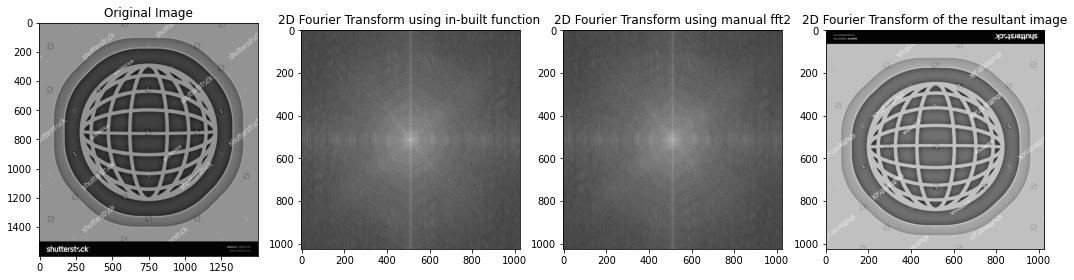

In [21]:
img_array = np.array(IMG1)
img_array = cv2.resize(img_array, (1024, 1024))

# Apply 2D Fourier Transform
res1 = np.fft.fft2(img_array)
res2 = fft2(img_array)
res3 = fft2(res2)

# Shift zero frequency components to the center
res1_shifted = np.fft.fftshift(res1)
res2_shifted = np.fft.fftshift(res2)
# res3_shifted = np.fft.fftshift(res3)

# Compute the magnitude spectrum (absolute values) for visualization
magnitude_spectrum1 = np.abs(res1_shifted)
magnitude_spectrum2 = np.abs(res2_shifted)
magnitude_spectrum3 = np.abs(res3)

# Display the original and the Fourier-transformed images side by side
plt.figure(figsize=(18, 8))

plt.subplot(1,4,1), plt.imshow(IMG1, cmap='gray')
plt.title('Original Image')

plt.subplot(1,4,2), plt.imshow(np.log(1 + magnitude_spectrum1), cmap='gray')
plt.title('2D Fourier Transform using in-built function ')

plt.subplot(1,4,3), plt.imshow(np.log(1 + magnitude_spectrum2), cmap='gray')
plt.title('2D Fourier Transform using manual fft2')

plt.subplot(1,4,4), plt.imshow(np.log(1 + magnitude_spectrum3), cmap='gray')
plt.title('2D Fourier Transform of the resultant image')

plt.show()

8

In [22]:
def ifft2(array):
    
    arr = np.conjugate(array)
    fourier_transform = fft2(arr)
    rows = len(fourier_transform)
    cols = len(fourier_transform[0])
    size = rows*cols
    result = np.conjugate(fourier_transform)/size
    return result
    

In [23]:
input_signal = np.array([[1, 2],
                         [3, 4]])

new_input = np.array([[1, 2, 3, 0],
                      [3, 2, 4, 0],
                      [12, 4, 5, 0],
                      [0, 0, 0, 0]])

check = ([[1, 2, 3],
          [3, 2, 4],
          [12, 4, 5]])

res1 = np.fft.ifft2(new_input)
res2 = ifft2(check)

print("Result using in built function for 2D IFFT: ")
print()
for row in res1:
    print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >=
          0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in row))

print()
print("Result using manual function IFFT2: ")
print()

for row in res2:
    print("  ".join(f"{val.real:.2f} + {val.imag:.2f}j" if val.imag >=
          0 else f"{val.real:.2f} - {abs(val.imag):.2f}j" for val in row))

Result using in built function for 2D IFFT: 

2.25 + 0.00j  0.25 + 0.50j  1.25 + 0.00j  0.25 - 0.50j
-0.94 + 0.56j  -0.69 - 0.19j  -0.69 + 0.31j  -0.44 + 0.06j
1.12 + 0.00j  0.38 + 0.25j  0.62 + 0.00j  0.38 - 0.25j
-0.94 - 0.56j  -0.44 - 0.06j  -0.69 - 0.31j  -0.69 + 0.19j

Result using manual function IFFT2: 

2.25 + -0.00j  0.25 + 0.50j  1.25 + -0.00j  0.25 - 0.50j
-0.94 + 0.56j  -0.69 - 0.19j  -0.69 + 0.31j  -0.44 + 0.06j
1.12 + -0.00j  0.38 + 0.25j  0.62 + -0.00j  0.38 - 0.25j
-0.94 - 0.56j  -0.44 - 0.06j  -0.69 - 0.31j  -0.69 + 0.19j


### QUESTION 2

1.  Ideal LPF

In [24]:
def ideal_mask(shape, D0):
    rows, cols = shape
    hrow = rows//2
    hcol = cols//2

    x = np.arange(cols) - hcol
    y = np.arange(rows) - hrow
    X,Y = np.meshgrid(x,y)

    dist = np.sqrt(X**2 + Y**2)
    mask = dist <= D0
    return mask

def idealLPF(image, D0):
    fft_transform = fft2(image)
    shifted_fft = np.fft.fftshift(fft_transform)

    mask = ideal_mask(image.shape, D0)
    # print("mask shape ", mask.shape )
    # print("image shape ", image.shape)
    # print("fft shape ", fft_transform.shape)
    # print("shifted fft ", shifted_fft.shape)
    f_transform_filtered = shifted_fft * mask

    # Shift zero frequency components back to the corners
    f_transform_filtered_shifted = np.fft.ifftshift(f_transform_filtered)

    # Apply 2D IFFT to get the filtered image
    filtered_image = np.abs(ifft2(f_transform_filtered_shifted))
    return filtered_image

2. 

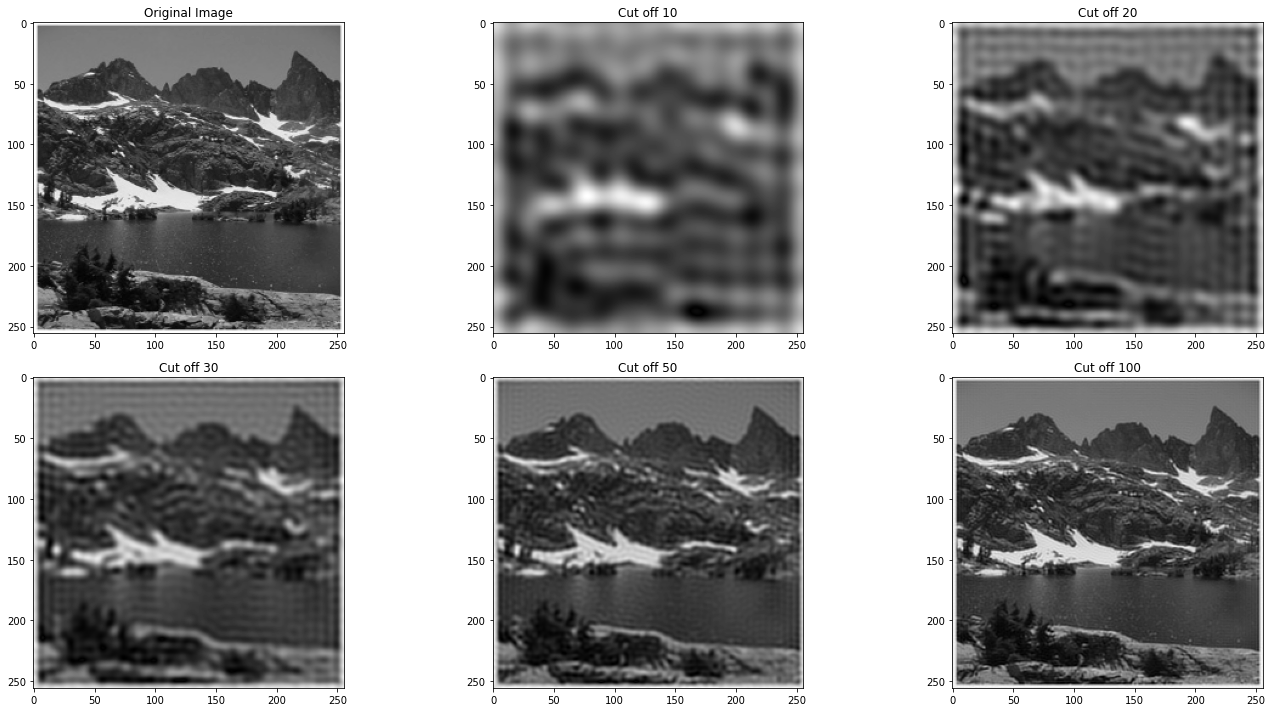

In [25]:

# range of cut-off frequencies when applying the Ideal LPF
cut_off = [10,20,30,50,100]
results = []

for  i in range(5):
    filtered_image = idealLPF(img2, cut_off[i])
    results.append(filtered_image)

# Display the original and filtered images

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')

# Plot the resulting images in the second row

for i in range(5):
    plt.subplot(2, 3, i + 2)
    plt.imshow(results[i], cmap='gray')  # Change the cmap as needed
    plt.title(f'Cut off {cut_off[i]}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

3. Gaussian LPF

In [26]:
def gauss_mask(shape, D0):
    rows, cols = shape
    hrow = rows//2
    hcol = cols//2
    
    x = np.arange(cols) - hcol
    y = np.arange(rows) - hrow
    X,Y = np.meshgrid(x,y)

    dist = np.sqrt(X**2 + Y**2)
    low_pass_mask = np.exp(-dist**2 / (2 * D0**2))
    return low_pass_mask


def gaussianLPF(image, D0):
    
    fft_transform = fft2(image)
    shifted_fft = np.fft.fftshift(fft_transform)

    mask = gauss_mask(image.shape, D0)
    f_transform_filtered = shifted_fft * mask

    # Shift zero frequency components back to the corners
    f_transform_filtered_shifted = np.fft.ifftshift(f_transform_filtered)

    # Apply 2D IFFT to get the filtered image
    filtered_image = np.abs(ifft2(f_transform_filtered_shifted))

    return filtered_image


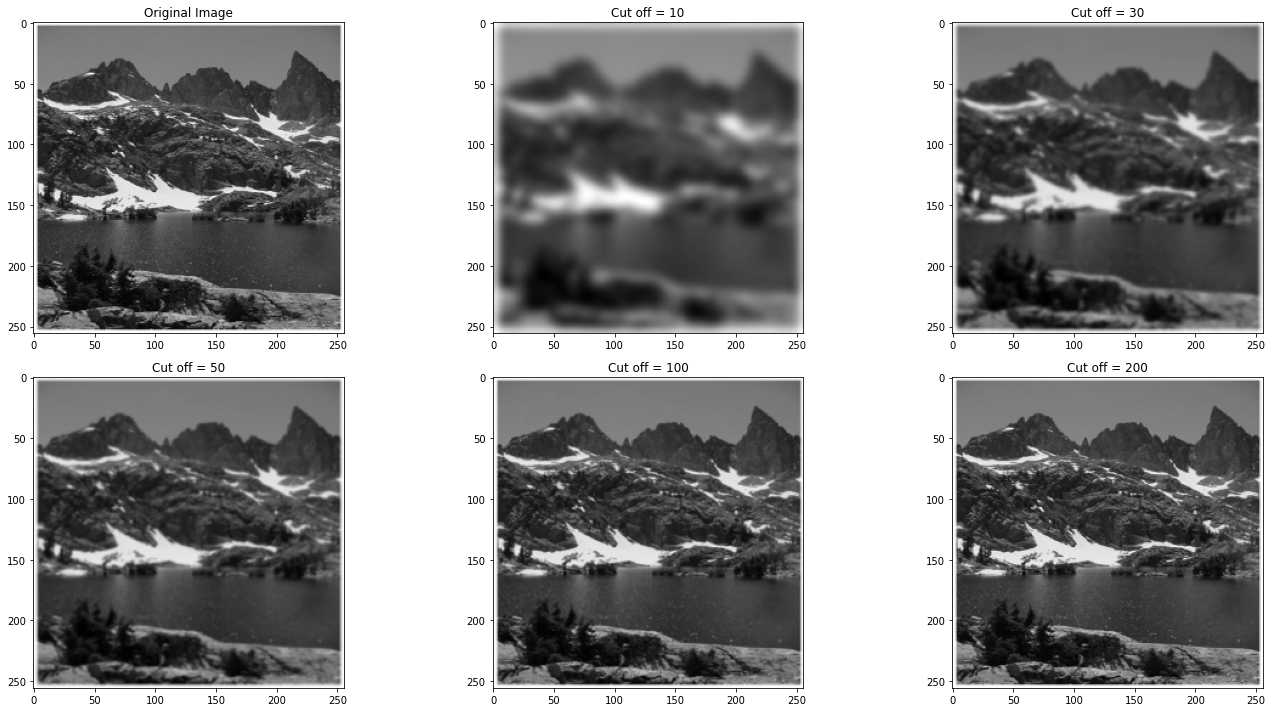

In [27]:
cut_off = [10,30,50,100,200]
results = []

for  i in range(5):
    filtered_image = gaussianLPF(img2, cut_off[i])
    results.append(filtered_image)


# Display the original and filtered images

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')

# Plot the resulting images in the second row
for i in range(5):
    plt.subplot(2, 3, i + 2)
    plt.imshow(results[i], cmap='gray')  # Change the cmap as needed
    plt.title(f'Cut off = {cut_off[i]}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

+ Notice that Ideal Low Pass filter produces Ringing artifacts in the resultant image, which is absent in Gaussian Low Pass filter.

+ This is because the ideal LPF has a sharp cutoff in the frequency domain. It completely eliminates high-frequency components beyond a certain threshold, leading to a sudden transition from the preserved low-frequency components to the eliminated high-frequency components. This abrupt transition introduces ringing artifacts in the spatial domain.

+ On the other hand, the Gaussian filter has a smooth and gradual frequency response. It doesn't completely eliminate high frequencies but rather attenuates them continuously. Hence sharp transition is avoided.

4. Comparing Gaussian LPF and Gaussian Blur outputs

In [28]:
def conv2D(img, kernel):

    h, w = img.shape

    kernel_size = kernel.shape[0]   
    # Since we are assuming a square kernel, kernel.shape[0] = kernel.shape[1]
    pad = kernel_size // 2
    output_img = np.zeros((h, w))
    
    for i in range(h):
        for j in range(w):
            
            # bounds for region that we want to extract

            top = max(i - pad, 0)
            left = max(j - pad, 0)
            bottom = min(i + pad + 1, h-1)
            right = min(j + pad + 1, w-1)
          
            region = img[top:bottom, left:right]
            region_height, region_width = region.shape

            # Variable to accumulate the result
            result = 0
            
            if region_height > 0 and region_width > 0:
                # Adjust the kernel size if it's larger than the region
                kernel_region = kernel[:region_height, :region_width]
                result = np.sum(region * kernel_region)

                # Assign the result to the corresponding pixel in the output image
                
                output_img[i, j] = result
                
    return output_img

In [29]:
def gaussianFilter(img, k, sigma):

    # Generate a 2D Gaussian kernel
    kernel = np.fromfunction(
    lambda x, y: np.exp(- ((x - (k-1)/2)**2 + (y - (k-1)/2)**2) / (2*sigma**2)),
    (k, k))

    # Normalize the kernel
    kernel = kernel / np.sum(kernel)
    filtered_img = conv2D(img, kernel)
    return filtered_img


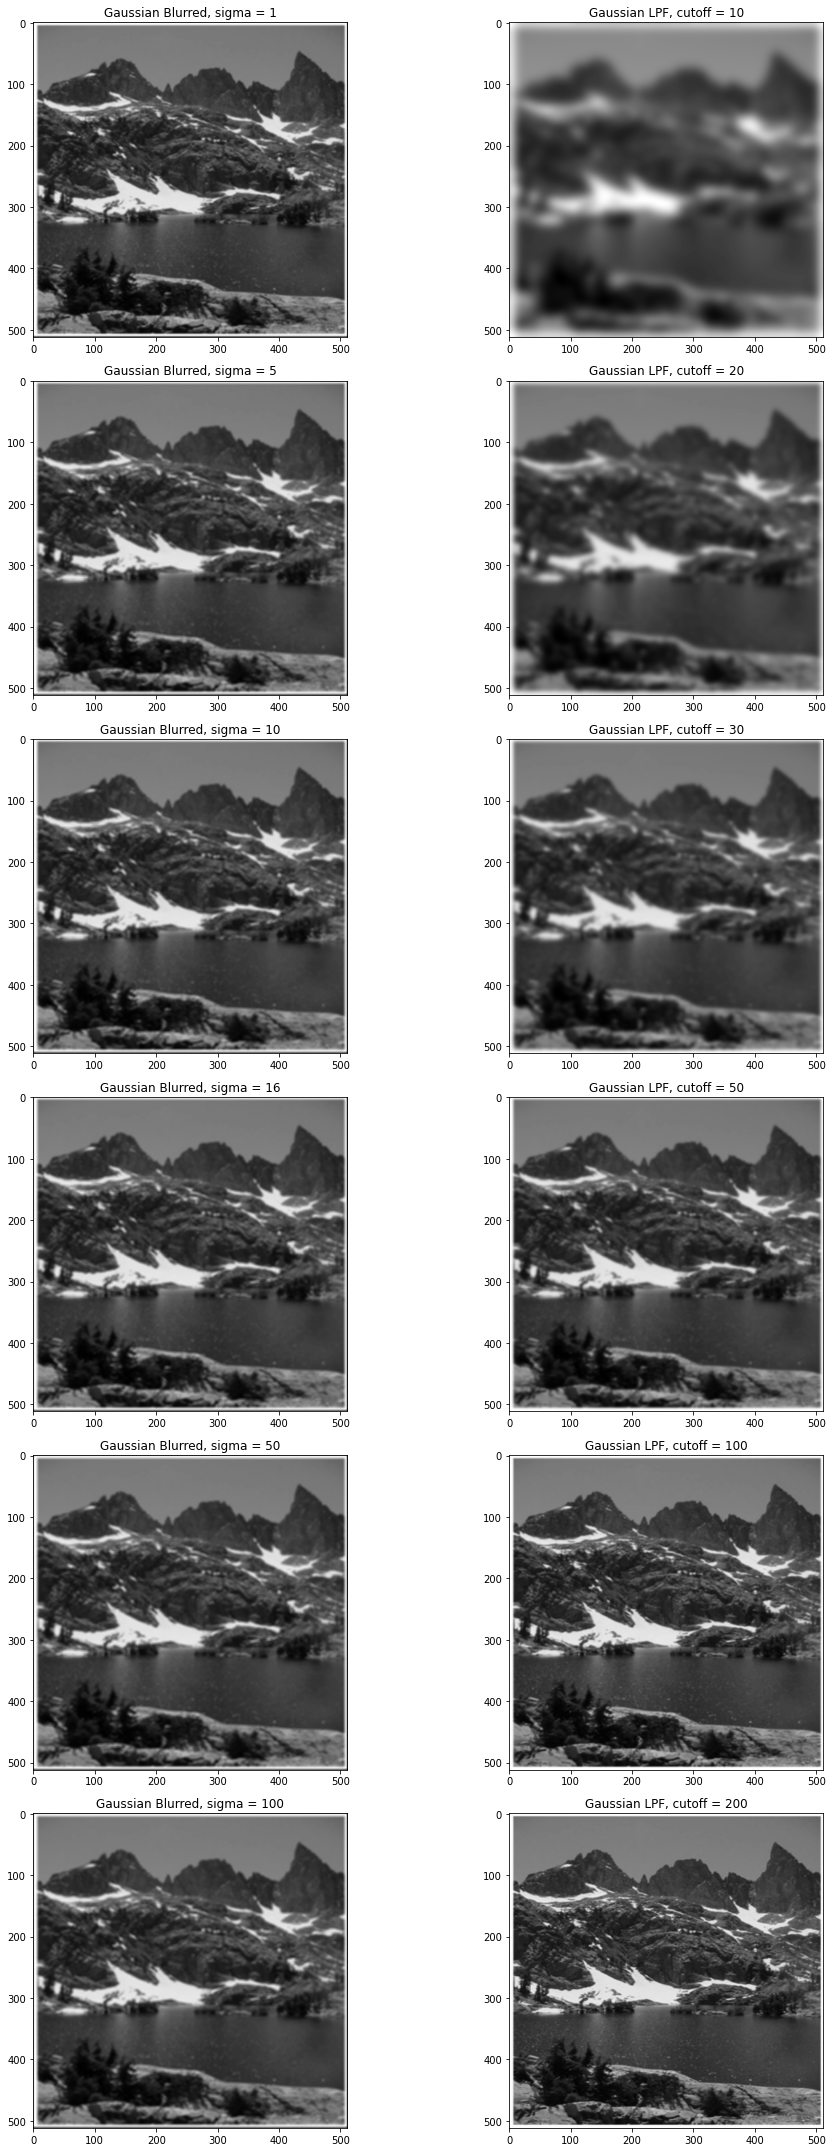

In [36]:
sigma_values = [1, 5, 10, 16, 50, 100]
cut_off_values = [10,20,30,50,100,200]

# plt.figure(figsize=(15,50))

fig, axs = plt.subplots(6, 2, figsize=(15, 30))

for i, (sigma, cutoff) in enumerate(zip(sigma_values, cut_off_values)):

    Gaussian_blur = gaussianFilter(img2, 5, sigma)
    Gaussian_LPF = gaussianLPF(img2,cutoff)

    # Plot the original and processed images side by side in each row
    axs[i, 0].imshow(Gaussian_blur, cmap='gray')
    axs[i, 0].set_title(f'Gaussian Blurred, sigma = {sigma}')
    
    axs[i, 1].imshow(Gaussian_LPF, cmap='gray')
    axs[i, 1].set_title(f'Gaussian LPF, cutoff = {cutoff}')


plt.tight_layout()
plt.show()


+ We Notice that the Gaussian Blur Filter makes the image progressively more blurred as sigma vaue increases. 
This is because the sigma parameter controls the spread or standard deviation of the Gaussian distribution. A higher sigma leads to a broader distribution, causing neighboring pixel values to contribute more significantly to the convolution, resulting in more blurring effect.

+ Comversely, Gaussian LPF makes the progressively more enhances and pronounced as the cut off frequency is increased. This is because Low Pass Filters allow all frequencies below the threshold frequence to pass through, while eliminating all frequencies higher than the threshold. Ahigher cut-off frequency permits a broader range of lower frequencies to pass through, preserving more details in the image.

### QUESTION 3

In [31]:
img3 = cv2.resize(IMG3, (1024,1024))

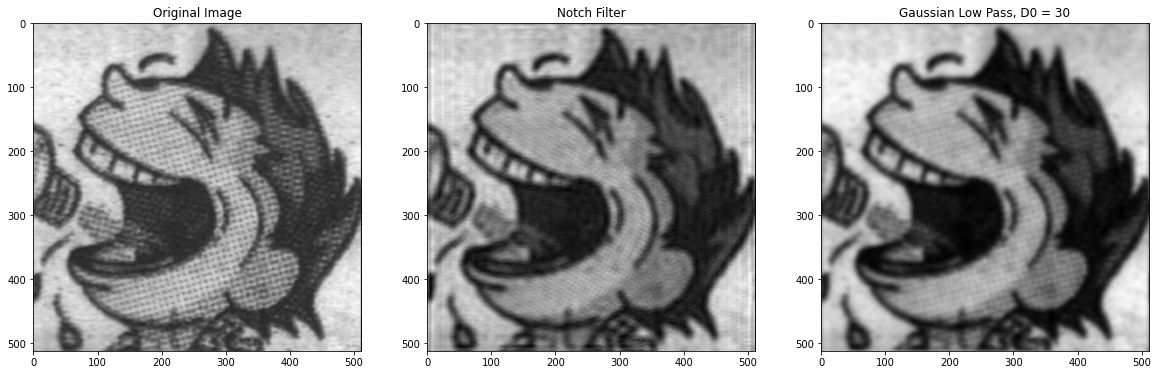

In [40]:

def notch_mask(image, shifted_transform, center_frequency, notch_width):
    rows, cols = image.shape
    hrow = rows//2
    hcol = cols//2
    notch_filter = np.ones_like(shifted_transform)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - hrow)**2 + (j - hcol)**2)
            if center_frequency - notch_width /2 <= distance and distance <= center_frequency + notch_width/2:
                notch_filter[i, j] = 0

    return notch_filter


def ideal_notch_filter(image, center_frequency, notch_width):

    f_transform = fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    mask = notch_mask (image, f_transform_shifted, center_frequency, notch_width)

    # Apply the notch mask
    filtered_transform = f_transform_shifted * mask

    # Inverse transform to get the filtered image
    shifted_filtered_transform = np.fft.ifftshift(filtered_transform)
    filtered_image = ifft2(shifted_filtered_transform).real

    return filtered_image

# Set the center frequency and notch width

center_frequency = 50 
notch_width = 30  

notch_filtered = ideal_notch_filter(img3, center_frequency, notch_width)
gaussian_filtered = gaussianLPF(img3, 30)

# Display the original and filtered images
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(notch_filtered, cmap='gray')
plt.title('Notch Filter')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Low Pass, D0 = 30')

plt.show()
